<a href="https://colab.research.google.com/github/Prasaraj/PLOSOne-Pras/blob/Weather/PLOSOne_A_Data_Driven_Approach_to_Improve_Coffee_Drying_Combining_Environmental_Sensors_and_Chemical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Below is the reproducible code for 'A Data-Driven Approach to Improve Coffee Drying: Combining Environmental Sensors and Chemical Analysis,' published in PLOS ONE.

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Download Weather data from https://drive.google.com/drive/folders/1PxSRF7mYk0XN8JjtmGfcF4OUljRzrunM?usp=sharing

Then change your path

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import glob
import matplotlib.dates as mdates
from sklearn.cluster import KMeans

# Read the relevant data from the CSV files
file_pattern = "/content/drive/MyDrive/Colab Notebooks/WeatherStation-CoffeeDrying/2CBC/*.csv"
csv_files = glob.glob(file_pattern)
dataframes = [pd.read_csv(file) for file in csv_files]
data = pd.concat(dataframes)

# Remove rows with NaN values
data_without_nan = data.dropna()

# Save the cleaned data to a new CSV file
data_without_nan.to_csv("cleaned_data.csv", index=False)  # Replace "cleaned_data.csv" with the desired output file name


<ipython-input-15-b570c47ff045>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Date'] = df_filtered['Timestamp'].dt.date
<ipython-input-15-b570c47ff045>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Hour'] = df_filtered['Timestamp'].dt.hour


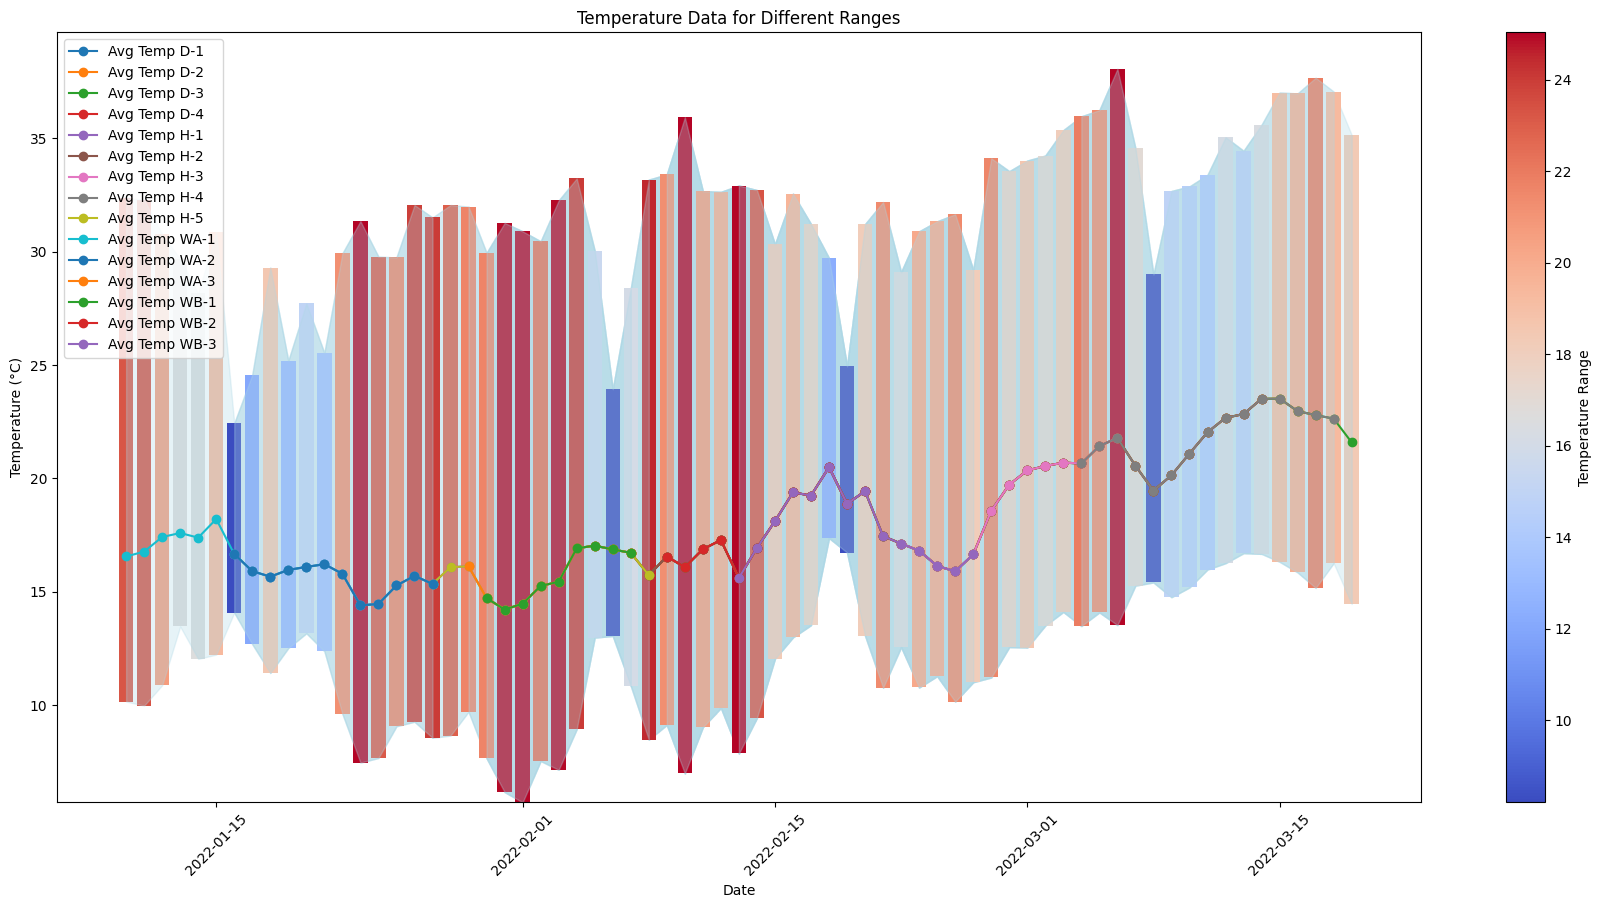

In [ ]:
%matplotlib inline
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Specify the file pattern to match the CSV files
#file_pattern = "/content/drive/MyDrive/Colab Notebooks/WeatherStation-CoffeeDrying/OutDoorMaetonLuang/*.csv"
file_pattern = "/content/cleaned_data.csv"
# Get a list of all CSV files that match the pattern
csv_files = glob.glob(file_pattern)

# Read each CSV file into a separate DataFrame
dataframes = [pd.read_csv(file) for file in csv_files]

# Concatenate all the DataFrames into a single DataFrame
df = pd.concat(dataframes)

# Convert the 'Timestamp' column to datetime type
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Filter the data between 1/3/2022 and 15/03/2022
start_date = pd.to_datetime('2021-11-05')
end_date = pd.to_datetime('2022-03-30')
df_filtered = df[(df['Timestamp'] >= start_date) & (df['Timestamp'] <= end_date)]

# Extract the date and hour from the 'Timestamp' column
df_filtered['Date'] = df_filtered['Timestamp'].dt.date
df_filtered['Hour'] = df_filtered['Timestamp'].dt.hour

# Calculate the minimum, maximum, and average temperature for each date
df_temp = df_filtered.groupby('Date')['Temperature'].agg(['min', 'max']).reset_index()
df_avg_temp = df_filtered.groupby('Date')['Temperature'].mean().reset_index()

# Filter the dataframe based on the date range for each sample
#filtered_df = df_temp[(df_temp['Date'] >= pd.to_datetime('2022-03-04')) & (df_temp['Date'] <= pd.to_datetime('2022-03-19'))]

# Calculate the temperature range
df_temp['range'] = df_temp['max'] - df_temp['min']

# Define a custom colormap
cmap = plt.get_cmap('coolwarm')
norm = mcolors.Normalize(vmin=df_temp['range'].min(), vmax=df_temp['range'].max())

date_ranges = {
    'Sample': ['D-1', 'D-2', 'D-3', 'D-4', 'H-1', 'H-2', 'H-3', 'H-4', 'H-5', 'WA-1', 'WA-2', 'WA-3', 'WB-1', 'WB-2', 'WB-3'],
    'Start dried date': ['2/4/2022', '2/7/2022', '2/8/2022', '2/8/2022', '1/16/2022', '1/30/2022', '2/22/2022', '3/4/2022', '1/27/2022', '1/10/2022', '1/16/2022', '1/29/2022', '1/30/2022', '2/9/2022', '2/13/2022'],
    'End dried date': ['3/5/2022', '3/18/2022', '3/20/2022', '3/15/2022', '2/3/2022', '2/14/2022', '3/7/2022', '3/19/2022', '2/9/2022', '1/28/2022', '1/28/2022', '2/8/2022', '2/8/2022', '2/21/2022', '2/27/2022']
}

# Create a grid of subplots
fig, ax = plt.subplots(figsize=(22, 10))

# Iterate through each range date in date_ranges
for i in range(len(date_ranges['Sample'])):
    range_name = date_ranges['Sample'][i]
    start_date = pd.to_datetime(date_ranges['Start dried date'][i])
    end_date = pd.to_datetime(date_ranges['End dried date'][i])

    # Filter the dataframe for the specific range date
    df_range = df_filtered[(df_filtered['Timestamp'] >= start_date) & (df_filtered['Timestamp'] <= end_date)]

    # Calculate the temperature range
    df_range_temp = df_range.groupby('Date')['Temperature'].agg(['min', 'max']).reset_index()
    df_range_temp['range'] = df_range_temp['max'] - df_range_temp['min']

    # Define a custom colormap
    cmap = plt.get_cmap('coolwarm')
    norm = mcolors.Normalize(vmin=df_range_temp['range'].min(), vmax=df_range_temp['range'].max())

    # Plot the bar plot with gradient color for this range date
    ax.bar(df_range_temp['Date'], df_range_temp['range'], bottom=df_range_temp['min'], color=cmap(norm(df_range_temp['range'])))

    # Plot the bar graph with the average temperature line
    df_range_avg_temp = df_range.groupby('Date')['Temperature'].mean().reset_index()
    ax.plot(df_range_avg_temp['Date'], df_range_avg_temp['Temperature'], marker='o', label=f'Avg Temp {range_name}')

    # Add the area plot with the cumulative sum of temperature
    ax.fill_between(df_range_temp['Date'], df_range_temp['min'], df_range_temp['max'], color='lightblue', alpha=0.3)

# Assign labels and title to the plot
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Temperature Data for Different Ranges')

# Rotate x-axis labels for better readability
ax.tick_params(axis='x', rotation=45)

# Display the legend
ax.legend()

# Add colorbar
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Temperature Range')

# Save the plot
plt.savefig('Fig3.png')

# Display the plot
plt.show()


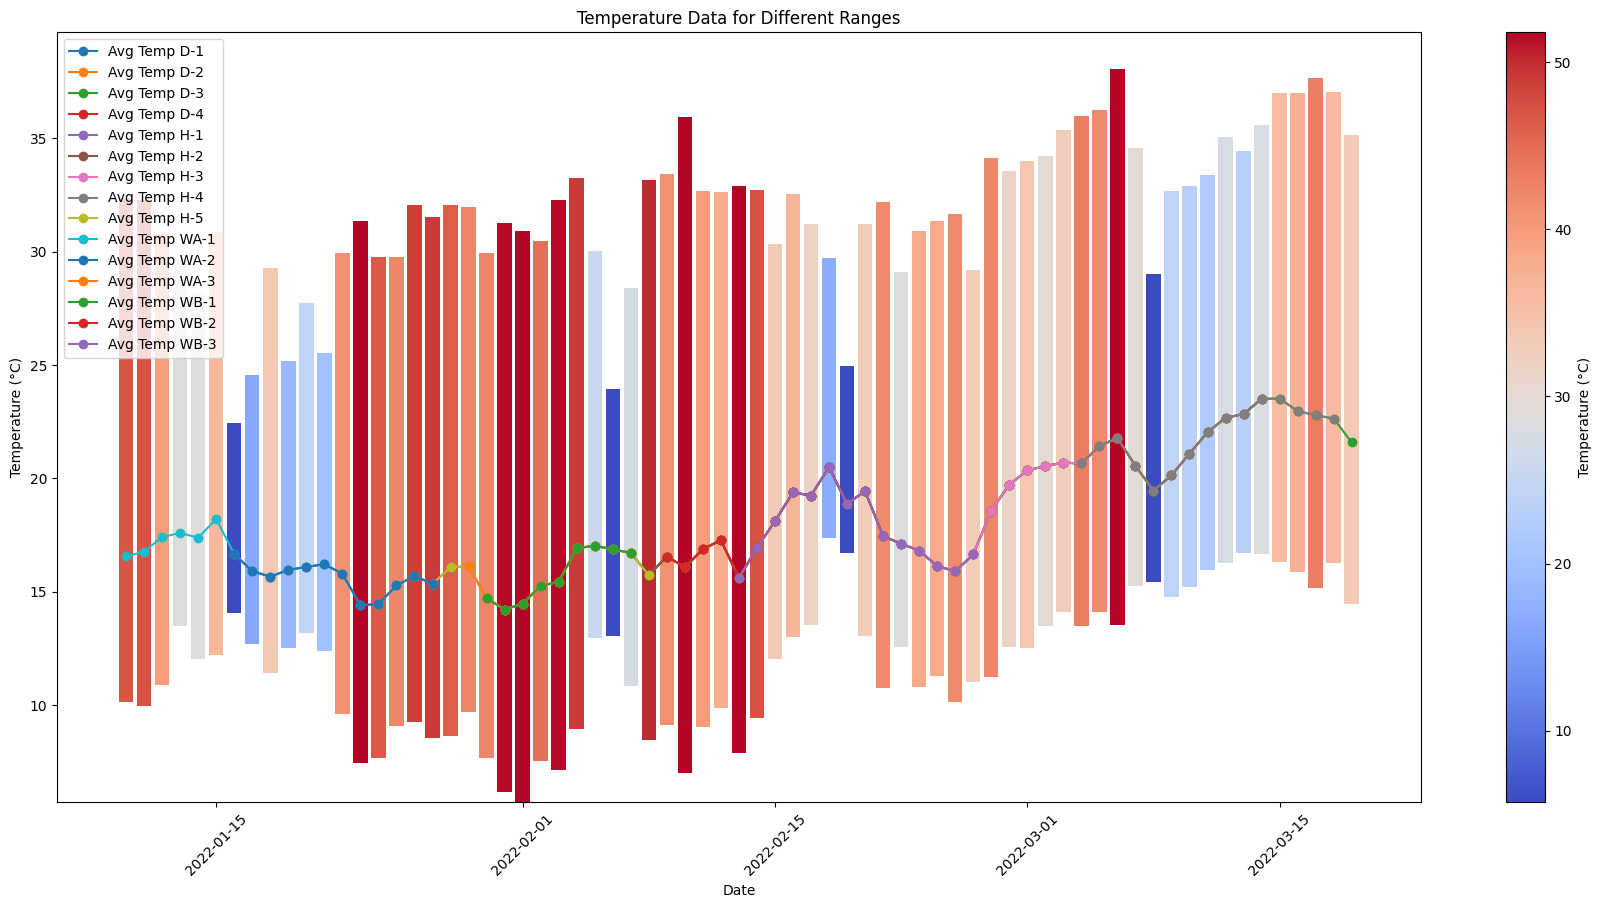

In [ ]:
#Fig3

# Get the minimum and maximum temperature values for the entire dataset
min_temp = df_filtered['Temperature'].min()
max_temp = df_filtered['Temperature'].max()

# Create a grid of subplots
fig, ax = plt.subplots(figsize=(22, 10))

# Iterate through each range date in date_ranges
for i in range(len(date_ranges['Sample'])):
    range_name = date_ranges['Sample'][i]
    start_date = pd.to_datetime(date_ranges['Start dried date'][i])
    end_date = pd.to_datetime(date_ranges['End dried date'][i])

    # Filter the dataframe for the specific range date
    df_range = df_filtered[(df_filtered['Timestamp'] >= start_date) & (df_filtered['Timestamp'] <= end_date)]

    # Calculate the temperature range
    df_range_temp = df_range.groupby('Date')['Temperature'].agg(['min', 'max']).reset_index()
    df_range_temp['range'] = df_range_temp['max'] - df_range_temp['min']

    # Define a custom colormap
    cmap = plt.get_cmap('coolwarm')
    norm = mcolors.Normalize(vmin=df_range_temp['range'].min(), vmax=df_range_temp['range'].max())

    # Plot the bar plot with gradient color for this range date
    ax.bar(df_range_temp['Date'], df_range_temp['range'], bottom=df_range_temp['min'], color=cmap(norm(df_range_temp['range'])))

    # Plot the bar graph with the average temperature line
    df_range_avg_temp = df_range.groupby('Date')['Temperature'].mean().reset_index()
    ax.plot(df_range_avg_temp['Date'], df_range_avg_temp['Temperature'], marker='o', label=f'Avg Temp {range_name}')

    # Add the area plot with the cumulative sum of temperature
    #ax.fill_between(df_range_temp['Date'], df_range_temp['min'], df_range_temp['max'], color='lightblue', alpha=0.3)

# Assign labels and title to the plot
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Temperature Data for Different Ranges')

# Rotate x-axis labels for better readability
ax.tick_params(axis='x', rotation=45)

# Display the legend
ax.legend()

# Define a custom colormap (in this case, going from blue to red)
cmap = plt.get_cmap('coolwarm')

# Set the minimum and maximum values for the colorbar
min_color = min_temp
max_color = max_temp
norm = mcolors.Normalize(vmin=min_color, vmax=max_color)

# ... Rest of your code ...

# Add colorbar with custom colormap and range
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label(f'Temperature (°C)')

# Save the plot
plt.savefig('Fig3.png-1.png')

# Display the plot
plt.show()


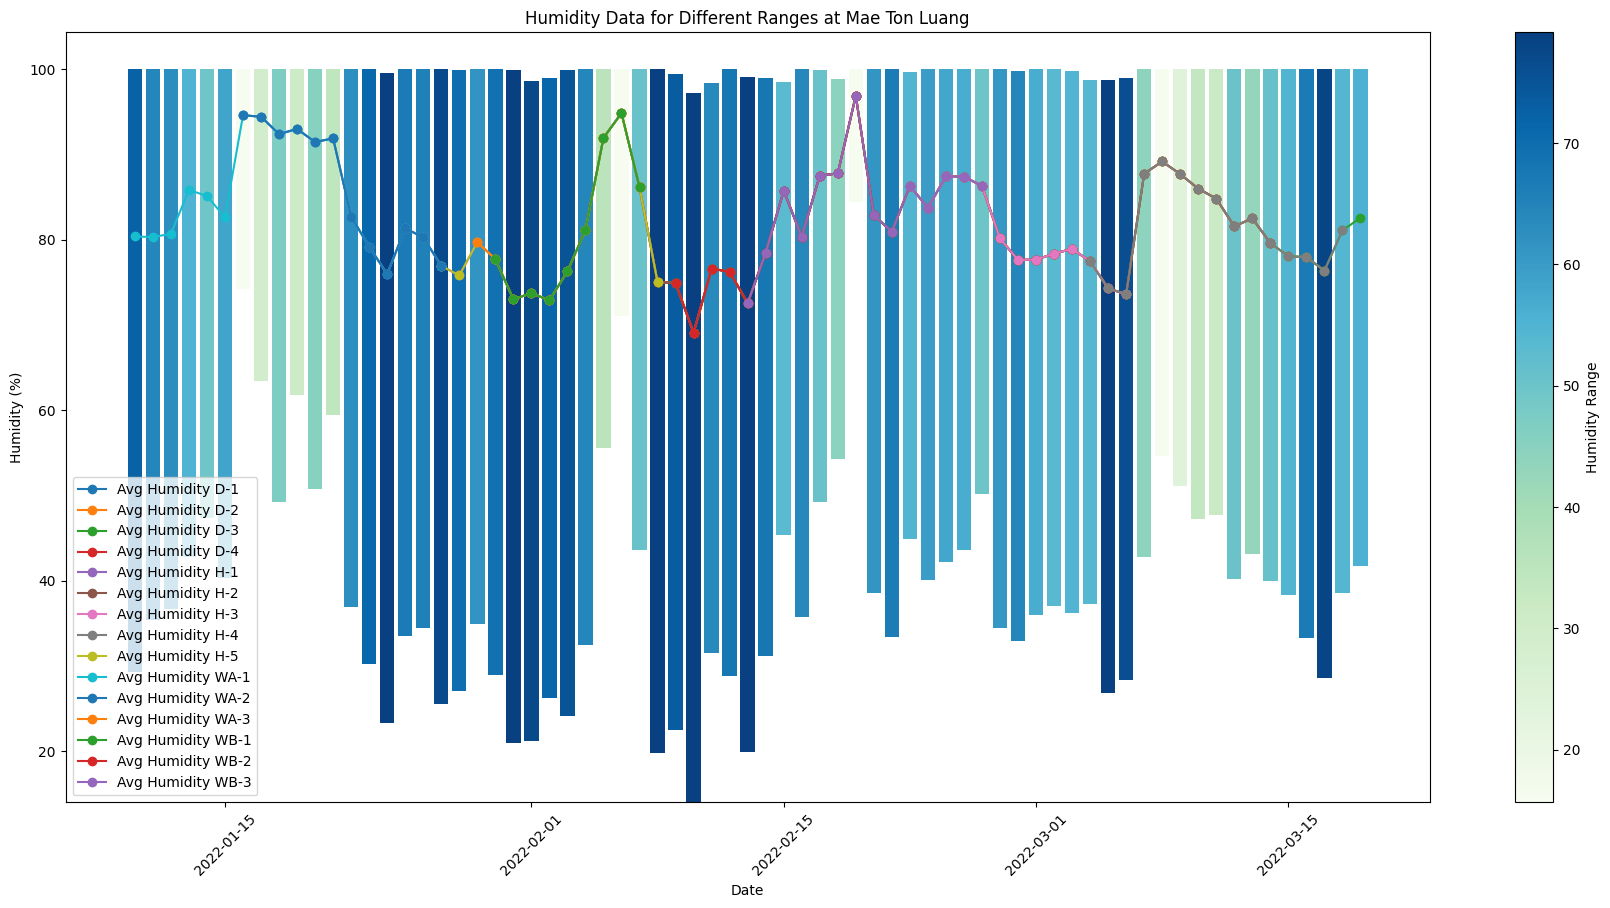

In [ ]:
# Create a grid of subplots
fig, ax = plt.subplots(figsize=(22, 10))

# Iterate through each range date in date_ranges
for i in range(len(date_ranges['Sample'])):
    range_name = date_ranges['Sample'][i]
    start_date = pd.to_datetime(date_ranges['Start dried date'][i])
    end_date = pd.to_datetime(date_ranges['End dried date'][i])

    # Filter the dataframe for the specific range date
    df_range = df_filtered[(df_filtered['Timestamp'] >= start_date) & (df_filtered['Timestamp'] <= end_date)]

    # Calculate the humidity range
    df_range_humidity = df_range.groupby('Date')['Humidity'].agg(['min', 'max']).reset_index()
    df_range_humidity['range'] = df_range_humidity['max'] - df_range_humidity['min']

    # Define a custom colormap for humidity
    cmap_humidity = plt.get_cmap('GnBu')
    norm_humidity = mcolors.Normalize(vmin=df_range_humidity['range'].min(), vmax=df_range_humidity['range'].max())

    # Plot the bar plot with gradient color for humidity
    ax.bar(df_range_humidity['Date'], df_range_humidity['range'], bottom=df_range_humidity['min'], color=cmap_humidity(norm_humidity(df_range_humidity['range'])))

    # Define a custom colormap for humidity with higher resolution
    #cmap_humidity = plt.get_cmap('YlGnBu', 10)  # 100 is the number of color segments

    # Define normalization for humidity range
   # norm_humidity = mcolors.Normalize(vmin=df_range_humidity['range'].min(), vmax=df_range_humidity['range'].max())

    # Plot the bar plot with gradient color for humidity
    #ax_humidity.bar(df_range_humidity['Date'], df_range_humidity['range'], bottom=df_range_humidity['min'], color=cmap_humidity(norm_humidity(df_range_humidity['range'])))


    # Plot the bar graph with the average humidity line
    df_range_avg_humidity = df_range.groupby('Date')['Humidity'].mean().reset_index()
    ax.plot(df_range_avg_humidity['Date'], df_range_avg_humidity['Humidity'], marker='o', label=f'Avg Humidity {range_name}')

    # Add the area plot with the cumulative sum of humidity
    #ax.fill_between(df_range_humidity['Date'], df_range_humidity['min'], df_range_humidity['max'], color='lightblue', alpha=0.3)

# Assign labels and title to the plot
ax.set_xlabel('Date')
ax.set_ylabel('Humidity (%)')  # Update ylabel to indicate humidity
ax.set_title('Humidity Data for Different Ranges at Mae Ton Luang')  # Update title

# Rotate x-axis labels for better readability
ax.tick_params(axis='x', rotation=45)

# Display the legend
ax.legend()

# Add colorbar for humidity
cbar_humidity = plt.colorbar(plt.cm.ScalarMappable(norm=norm_humidity, cmap=cmap_humidity), ax=ax)
cbar_humidity.set_label('Humidity Range')

# Save the plot
plt.savefig('Fig4.png', dpi = 300)  # Update file name

# Display the plot
plt.show()


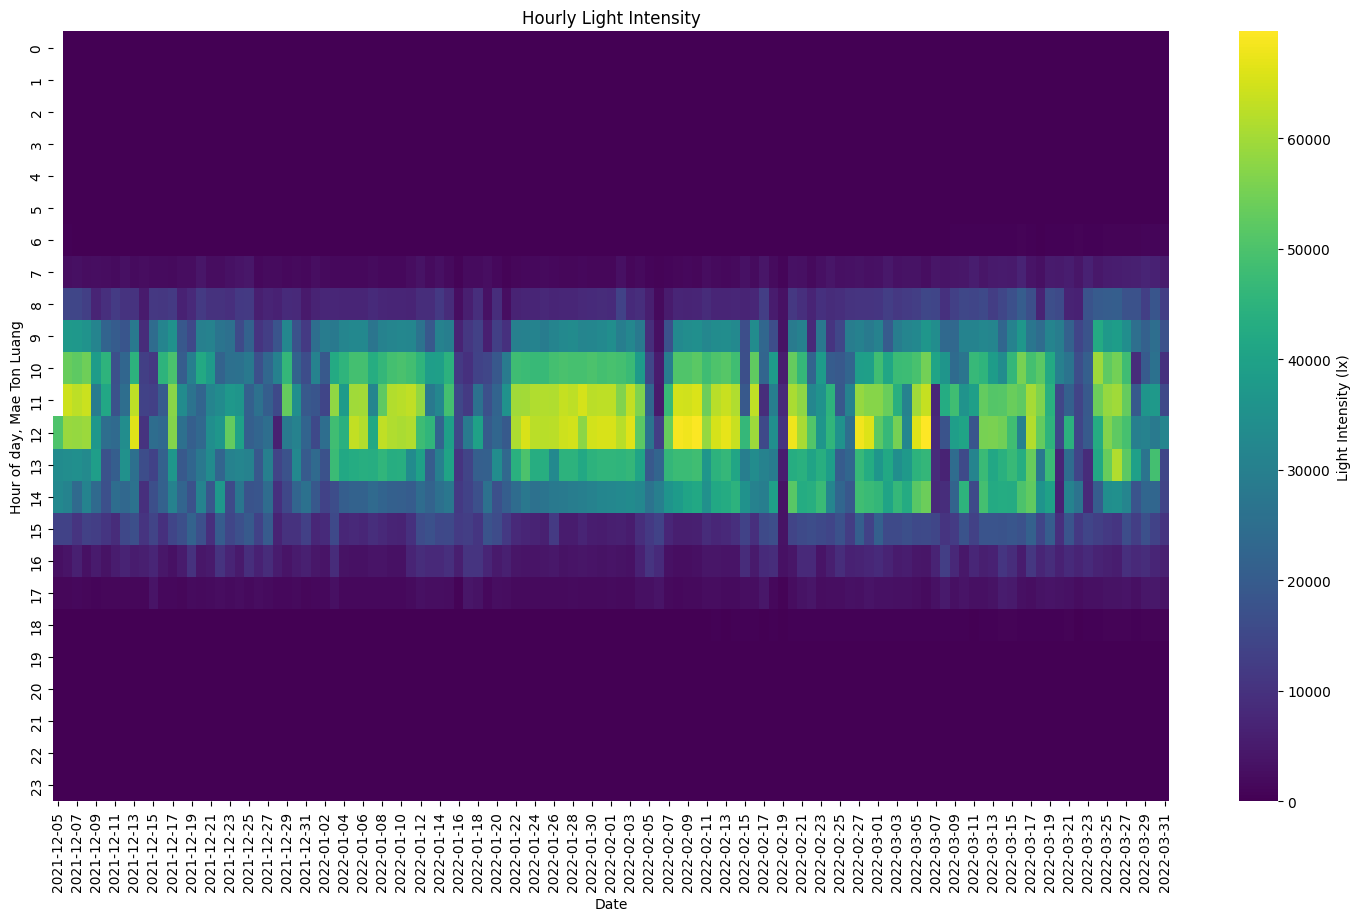

In [ ]:
#Fig5
%matplotlib inline
import pandas as pd
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

file_pattern = "cleaned_data.csv"
csv_files = glob.glob(file_pattern)
dataframes = [pd.read_csv(file) for file in csv_files]
df = pd.concat(dataframes)

# Convert 'Timestamp' column to datetime type
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set 'Timestamp' as the index (assuming it's not already)
df.set_index('Timestamp', inplace=True)

date_ranges = {
    'Sample': ['D-1', 'D-2', 'D-3', 'D-4', 'H-1', 'H-2', 'H-3', 'H-4', 'H-5', 'WA-1', 'WA-2', 'WA-3', 'WB-1', 'WB-2', 'WB-3'],
    'Start dried date': ['2/4/2022', '2/7/2022', '2/8/2022', '2/8/2022', '1/16/2022', '1/30/2022', '2/22/2022', '3/4/2022', '1/27/2022', '1/10/2022', '1/16/2022', '1/29/2022', '1/30/2022', '2/9/2022', '2/13/2022'],
    'End dried date': ['3/5/2022', '3/18/2022', '3/20/2022', '3/15/2022', '2/3/2022', '2/14/2022', '3/7/2022', '3/19/2022', '2/9/2022', '1/28/2022', '1/28/2022', '2/8/2022', '2/8/2022', '2/21/2022', '2/27/2022']
}

# Resample the data on an hourly basis and calculate the mean temperature for each hour
df_hourly = df.resample('H').mean()

# Create a pivot table for the heatmap
heatmap_data = df_hourly.pivot_table(columns=df_hourly.index.hour, index=df_hourly.index.date, values='LightIntensity')

# Transpose the data
heatmap_data = heatmap_data.T

# Create the heatmap
plt.figure(figsize=(18, 10))
#sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Light Intensity (lx)'})
sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'Light Intensity (lx)'})
#

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Hour of day, Mae Ton Luang')
plt.title('Hourly Light Intensity')

# Save the plot as a PNG file
plt.savefig('Fig5.png', dpi=300)

# Show the plot (optional)
plt.show()


<ipython-input-21-b866b1db21f6>:37: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


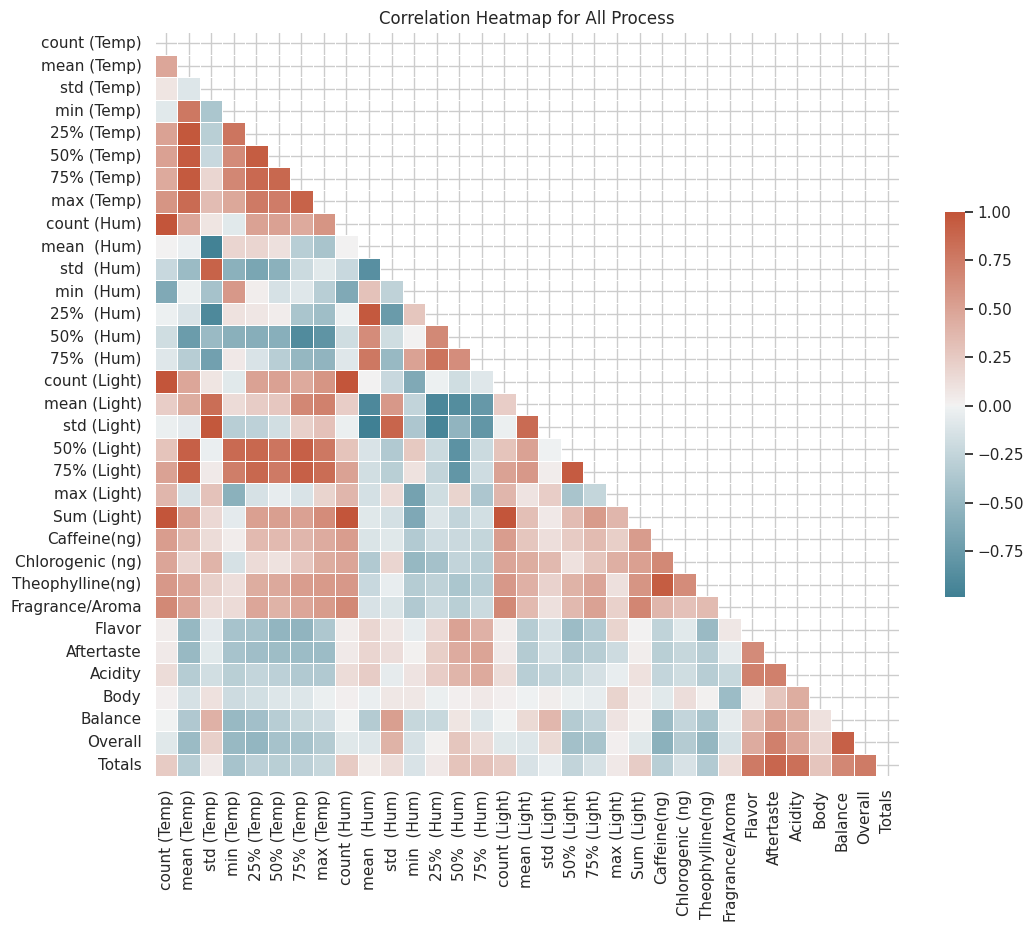

In [ ]:
#Fig7
import pandas as pd
import seaborn as sns
# Define the data
data = [
    ["D-1", 77684.00, 17.89, 6.63, 6.99, 12.99, 15.96, 21.94, 35.96, 77684.00, 82.06, 22.51, 14.04, 67.18, 95.60, 98.46, 77684.00, 10781.29, 18953.27, 12.41, 11547.65, 93929.48, 837533977.70, 344.52, 97.56, 1.23, 7.75, 7.75, 7.25, 7.25, 7.25, 7.25, 7.25, 81.75],
    ["D-2", 104445.00, 19.30, 6.91, 6.99, 14.22, 17.56, 23.99, 38.05, 104445.00, 81.31, 22.45, 14.04, 64.43, 94.80, 98.49, 104445.00, 11366.79, 19203.29, 46.87, 13418.50, 93929.48, 1187203892.00, 400.01, 123.71, 1.99, 7.50, 7.50, 7.50, 7.50, 7.75, 7.50, 7.50, 82.75],
    ["D-3", 107117.00, 19.50, 6.94, 6.99, 14.49, 17.70, 24.26, 38.05, 107117.00, 81.21, 22.42, 14.04, 64.14, 94.64, 98.43, 107117.00, 11438.34, 19188.74, 52.42, 13741.06, 93929.48, 1225240853.00, 244.18, 101.94, 0.86, 7.50, 7.75, 7.50, 7.75, 7.75, 7.50, 7.50, 83.25],
    ["D-4", 93734.00, 19.05, 6.85, 6.99, 13.98, 17.35, 23.71, 38.05, 93734.00, 81.50, 22.40, 14.04, 65.49, 94.98, 98.42, 93734.00, 11175.18, 19025.51, 42.59, 12902.40, 93929.48, 1047494399.00, 335.41, 96.33, 1.73, 7.25, 7.25, 7.25, 7.25, 7.75, 7.25, 7.25, 81.25],
    ["H-1", 50945.00, 15.41, 6.71, 5.72, 10.03, 13.90, 19.66, 32.05, 50945.00, 82.13, 24.14, 21.03, 72.14, 95.82, 99.30, 50945.00, 10426.40, 18885.30, 1.51, 10532.66, 87220.23, 531173202.50, 217.25, 90.19, 0.81, 7.00, 7.50, 7.50, 7.50, 7.75, 7.50, 7.50, 82.25],
    ["H-2", 42897.00, 15.89, 7.72, 5.72, 9.75, 13.37, 21.26, 35.92, 42897.00, 77.85, 26.90, 14.04, 53.79, 94.69, 98.14, 42897.00, 11837.14, 20827.61, 4.91, 11225.09, 93677.16, 507777601.50, 246.72, 121.48, 0.93, 7.00, 7.75, 7.50, 7.50, 7.75, 7.50, 7.50, 82.50],
    ["H-3", 34821.00, 18.95, 6.92, 10.16, 13.78, 15.98, 23.38, 38.05, 34821.00, 80.69, 22.44, 26.88, 62.11, 94.18, 98.58, 34821.00, 11553.77, 19201.75, 63.25, 13612.03, 93677.16, 402313899.80, 259.18, 95.67, 0.96, 7.25, 7.50, 7.00, 7.25, 7.75, 7.25, 7.25, 81.25],
    ["H-4", 40159.00, 21.87, 6.39, 13.49, 16.83, 18.92, 26.78, 38.05, 40159.00, 81.18, 21.34, 26.88, 63.65, 92.94, 98.53, 40159.00, 11710.51, 18861.96, 120.46, 15611.90, 75866.12, 470282485.40, 273.46, 82.09, 1.30, 7.25, 7.25, 7.25, 7.25, 7.50, 7.25, 7.25, 81.25],
    ["H-5", 37541.00, 15.67, 7.40, 5.72, 9.75, 13.57, 20.97, 33.22, 37541.00, 79.19, 26.06, 19.80, 57.06, 95.47, 98.40, 37541.00, 11474.37, 20417.25, 3.28, 10773.50, 89284.62, 430759209.30, 249.16, 97.36, 1.00, 7.50, 7.50, 7.50, 7.25, 7.50, 7.50, 7.50, 82.25],
    ["WA-1", 48275.00, 16.19, 5.85, 7.47, 11.84, 14.49, 19.72, 32.35, 48275.00, 84.93, 21.06, 23.36, 75.82, 96.88, 100.00, 48275.00, 9652.99, 17258.11, 0.88, 11289.60, 87220.23, 465998205.60, 224.11, 77.04, 0.71, 7.00, 7.75, 7.50, 7.75, 7.50, 7.50, 7.50, 82.50],
    ["WA-2", 32173.00, 15.62, 5.69, 7.47, 10.90, 14.38, 18.99, 32.05, 32173.00, 86.16, 20.53, 23.36, 80.34, 97.02, 100.00, 32173.00, 9073.06, 16970.02, 1.01, 9870.34, 87220.23, 291907577.60, 232.86, 79.49, 0.67, 7.00, 7.75, 7.75, 7.50, 7.75, 7.25, 7.50, 82.50],
    ["WA-3", 29496.00, 15.66, 7.17, 5.72, 9.85, 14.22, 20.72, 33.22, 29496.00, 80.09, 25.30, 21.03, 61.29, 95.51, 98.36, 29496.00, 11086.28, 19950.29, 3.25, 10386.43, 89284.62, 327000951.60, 362.55, 104.79, 1.51, 6.75, 7.50, 7.25, 7.50, 7.75, 7.25, 7.25, 81.25],
    ["WB-1", 26814.00, 15.61, 7.13, 5.72, 9.58, 14.36, 20.59, 33.22, 26814.00, 80.13, 25.42, 21.03, 62.86, 95.44, 98.38, 26814.00, 10956.13, 19798.02, 3.34, 10128.38, 89284.62, 293777746.30, 176.61, 49.64, 0.47, 7.00, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 83.50],
    ["WB-2", 32132.00, 17.91, 6.98, 6.99, 12.12, 16.95, 22.45, 35.92, 32132.00, 80.73, 24.05, 14.04, 65.63, 94.99, 97.74, 32132.00, 11046.24, 19761.81, 9.39, 10450.94, 93929.48, 354937841.80, 229.08, 85.74, 0.86, 7.00, 7.25, 7.00, 7.00, 7.50, 7.50, 7.50, 80.75],
    ["WB-3", 37485.00, 17.73, 5.74, 7.87, 13.10, 16.73, 21.37, 32.91, 37485.00, 84.57, 19.74, 19.89, 71.64, 96.13, 98.52, 37485.00, 9870.11, 17783.12, 12.79, 10579.97, 93929.48, 369981167.20, 251.02, 90.82, 0.88, 7.00, 7.50, 7.25, 7.50, 7.75, 7.25, 7.25, 81.75]
]

# Define column names
columns = ["Sample/Taste Note", "count (Temp)", "mean (Temp)", "std (Temp)", "min (Temp)", "25% (Temp)", "50% (Temp)",
           "75% (Temp)", "max (Temp)", "count (Hum)", "mean  (Hum)", "std  (Hum)", "min  (Hum)", "25%  (Hum)", "50%  (Hum)",
           "75%  (Hum)", "count (Light)", "mean (Light)", "std (Light)", "50% (Light)", "75% (Light)", "max (Light)",
           "Sum (Light)", "Caffeine(ng)", "Chlorogenic (ng)", "Theophylline(ng)", "Fragrance/Aroma", "Flavor", "Aftertaste",
           "Acidity", "Body", "Balance", "Overall", "Totals"]

# Create the DataFrame
df = pd.DataFrame(data, columns=columns)

# Print the DataFrame
#print(df)

# Calculate the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
#print(corr_matrix)

# Set the style of the heatmap
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Set the title
plt.title('Correlation Heatmap for All Process')

# Show the plot
plt.show()


<ipython-input-22-fe2b6f130fae>:26: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


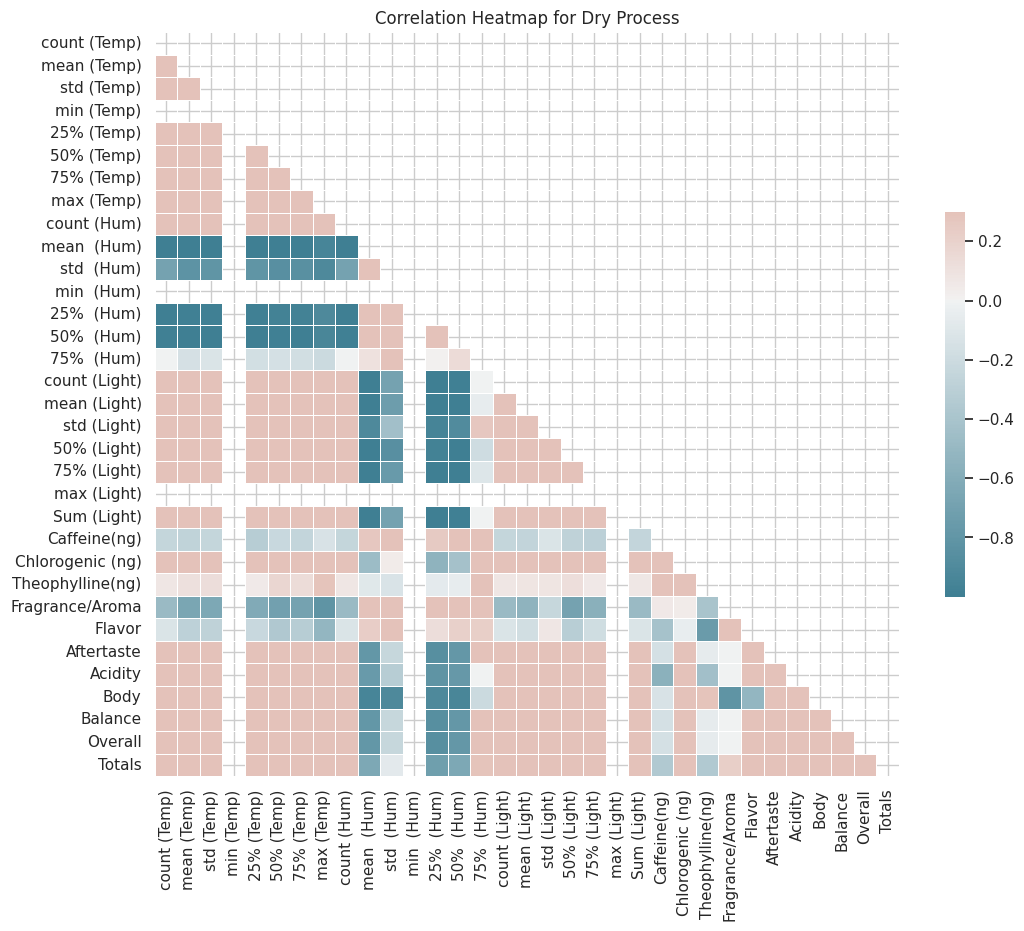

In [ ]:
#Fig8
import pandas as pd

# Define the data
data = [
    ["D-1", 77684.00, 17.89, 6.63, 6.99, 12.99, 15.96, 21.94, 35.96, 77684.00, 82.06, 22.51, 14.04, 67.18, 95.60, 98.46, 77684.00, 10781.29, 18953.27, 12.41, 11547.65, 93929.48, 837533977.70, 344.52, 97.56, 1.23, 7.75, 7.75, 7.25, 7.25, 7.25, 7.25, 7.25, 81.75],
    ["D-2", 104445.00, 19.30, 6.91, 6.99, 14.22, 17.56, 23.99, 38.05, 104445.00, 81.31, 22.45, 14.04, 64.43, 94.80, 98.49, 104445.00, 11366.79, 19203.29, 46.87, 13418.50, 93929.48, 1187203892.00, 400.01, 123.71, 1.99, 7.50, 7.50, 7.50, 7.50, 7.75, 7.50, 7.50, 82.75],
    ["D-3", 107117.00, 19.50, 6.94, 6.99, 14.49, 17.70, 24.26, 38.05, 107117.00, 81.21, 22.42, 14.04, 64.14, 94.64, 98.43, 107117.00, 11438.34, 19188.74, 52.42, 13741.06, 93929.48, 1225240853.00, 244.18, 101.94, 0.86, 7.50, 7.75, 7.50, 7.75, 7.75, 7.50, 7.50, 83.25],
    ["D-4", 93734.00, 19.05, 6.85, 6.99, 13.98, 17.35, 23.71, 38.05, 93734.00, 81.50, 22.40, 14.04, 65.49, 94.98, 98.42, 93734.00, 11175.18, 19025.51, 42.59, 12902.40, 93929.48, 1047494399.00, 335.41, 96.33, 1.73, 7.25, 7.25, 7.25, 7.25, 7.75, 7.25, 7.25, 81.25]
]

# Define column names
columns = ["Sample/Taste Note", "count (Temp)", "mean (Temp)", "std (Temp)", "min (Temp)", "25% (Temp)", "50% (Temp)",
           "75% (Temp)", "max (Temp)", "count (Hum)", "mean  (Hum)", "std  (Hum)", "min  (Hum)", "25%  (Hum)", "50%  (Hum)",
           "75%  (Hum)", "count (Light)", "mean (Light)", "std (Light)", "50% (Light)", "75% (Light)", "max (Light)",
           "Sum (Light)", "Caffeine(ng)", "Chlorogenic (ng)", "Theophylline(ng)", "Fragrance/Aroma", "Flavor", "Aftertaste",
           "Acidity", "Body", "Balance", "Overall", "Totals"]

# Create the DataFrame
df = pd.DataFrame(data, columns=columns)

# Print the DataFrame
#print(df)

# Calculate the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
#print(corr_matrix)

# Set the style of the heatmap
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio remove vmax = .3
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax = .3,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Set the title
plt.title('Correlation Heatmap for Dry Process')

# Show the plot
plt.show()


<ipython-input-23-f5a3caadb011>:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


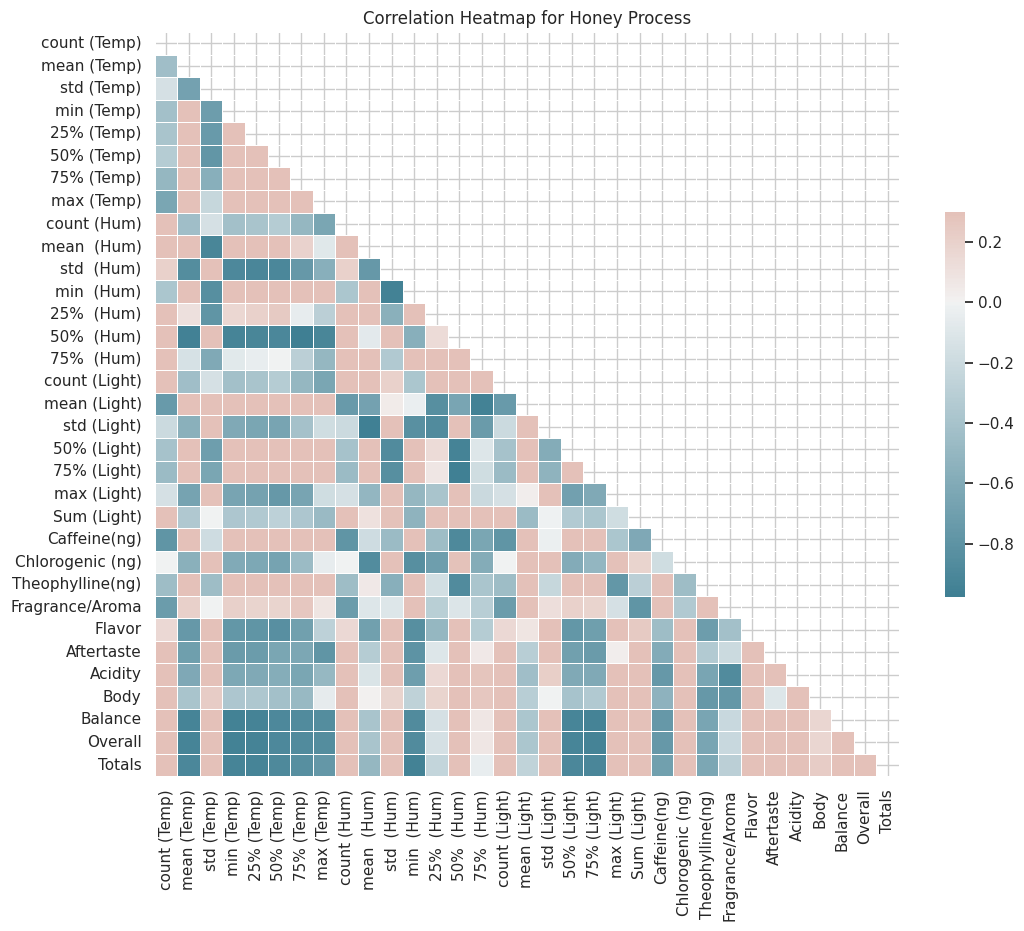

In [ ]:
#Fig9
import pandas as pd

# Define the data
data = [
    ["H-1", 50945.00, 15.41, 6.71, 5.72, 10.03, 13.90, 19.66, 32.05, 50945.00, 82.13, 24.14, 21.03, 72.14, 95.82, 99.30, 50945.00, 10426.40, 18885.30, 1.51, 10532.66, 87220.23, 531173202.50, 217.25, 90.19, 0.81, 7.00, 7.50, 7.50, 7.50, 7.75, 7.50, 7.50, 82.25],
    ["H-2", 42897.00, 15.89, 7.72, 5.72, 9.75, 13.37, 21.26, 35.92, 42897.00, 77.85, 26.90, 14.04, 53.79, 94.69, 98.14, 42897.00, 11837.14, 20827.61, 4.91, 11225.09, 93677.16, 507777601.50, 246.72, 121.48, 0.93, 7.00, 7.75, 7.50, 7.50, 7.75, 7.50, 7.50, 82.50],
    ["H-3", 34821.00, 18.95, 6.92, 10.16, 13.78, 15.98, 23.38, 38.05, 34821.00, 80.69, 22.44, 26.88, 62.11, 94.18, 98.58, 34821.00, 11553.77, 19201.75, 63.25, 13612.03, 93677.16, 402313899.80, 259.18, 95.67, 0.96, 7.25, 7.50, 7.00, 7.25, 7.75, 7.25, 7.25, 81.25],
    ["H-4", 40159.00, 21.87, 6.39, 13.49, 16.83, 18.92, 26.78, 38.05, 40159.00, 81.18, 21.34, 26.88, 63.65, 92.94, 98.53, 40159.00, 11710.51, 18861.96, 120.46, 15611.90, 75866.12, 470282485.40, 273.46, 82.09, 1.30, 7.25, 7.25, 7.25, 7.25, 7.50, 7.25, 7.25, 81.25],
    ["H-5", 37541.00, 15.67, 7.40, 5.72, 9.75, 13.57, 20.97, 33.22, 37541.00, 79.19, 26.06, 19.80, 57.06, 95.47, 98.40, 37541.00, 11474.37, 20417.25, 3.28, 10773.50, 89284.62, 430759209.30, 249.16, 97.36, 1.00, 7.50, 7.50, 7.50, 7.25, 7.50, 7.50, 7.50, 82.25]

]

# Define column names
columns = ["Sample/Taste Note", "count (Temp)", "mean (Temp)", "std (Temp)", "min (Temp)", "25% (Temp)", "50% (Temp)",
           "75% (Temp)", "max (Temp)", "count (Hum)", "mean  (Hum)", "std  (Hum)", "min  (Hum)", "25%  (Hum)", "50%  (Hum)",
           "75%  (Hum)", "count (Light)", "mean (Light)", "std (Light)", "50% (Light)", "75% (Light)", "max (Light)",
           "Sum (Light)", "Caffeine(ng)", "Chlorogenic (ng)", "Theophylline(ng)", "Fragrance/Aroma", "Flavor", "Aftertaste",
           "Acidity", "Body", "Balance", "Overall", "Totals"]

# Create the DataFrame
df = pd.DataFrame(data, columns=columns)

# Print the DataFrame
#print(df)

# Calculate the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
#print(corr_matrix)

# Set the style of the heatmap
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Set the title
plt.title('Correlation Heatmap for Honey Process')

# Show the plot
plt.show()


<ipython-input-24-4c5ea1aa3a9f>:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


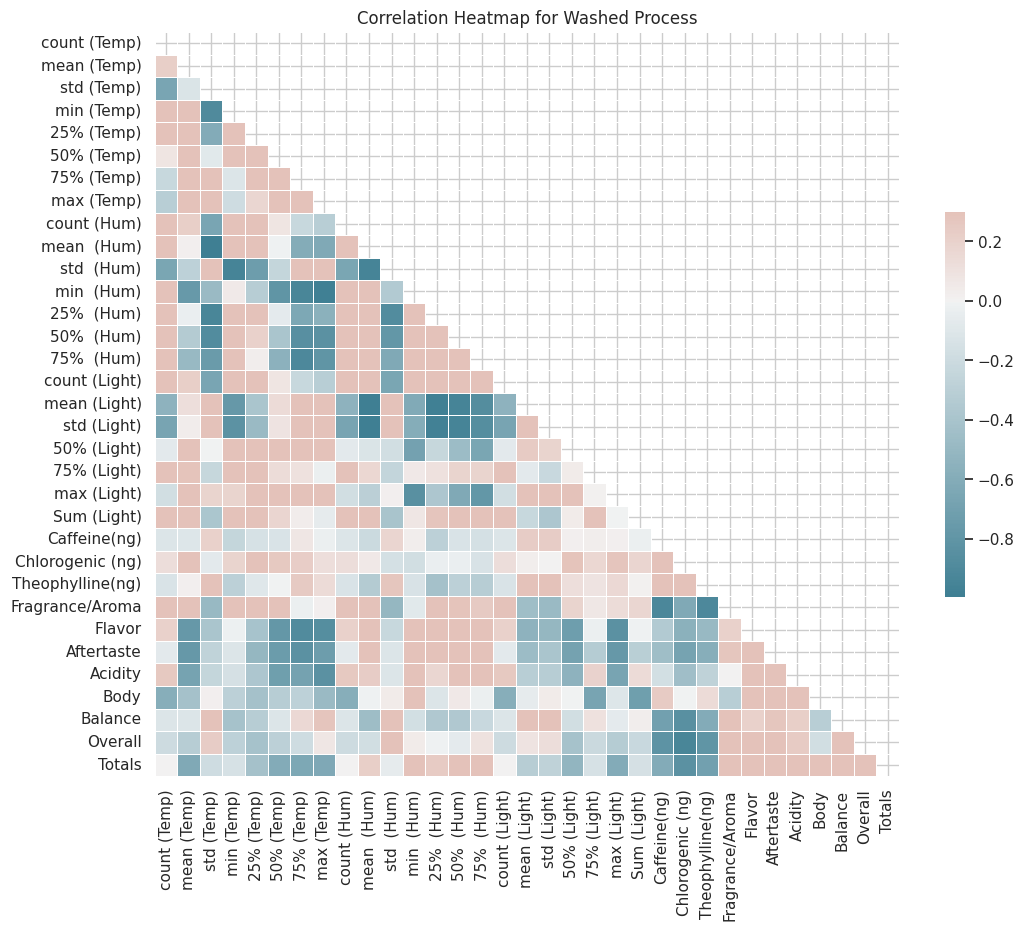

In [ ]:
#Fig10
import pandas as pd

# Define the data
data = [
    ["WA-1", 48275.00, 16.19, 5.85, 7.47, 11.84, 14.49, 19.72, 32.35, 48275.00, 84.93, 21.06, 23.36, 75.82, 96.88, 100.00, 48275.00, 9652.99, 17258.11, 0.88, 11289.60, 87220.23, 465998205.60, 224.11, 77.04, 0.71, 7.00, 7.75, 7.50, 7.75, 7.50, 7.50, 7.50, 82.50],
    ["WA-2", 32173.00, 15.62, 5.69, 7.47, 10.90, 14.38, 18.99, 32.05, 32173.00, 86.16, 20.53, 23.36, 80.34, 97.02, 100.00, 32173.00, 9073.06, 16970.02, 1.01, 9870.34, 87220.23, 291907577.60, 232.86, 79.49, 0.67, 7.00, 7.75, 7.75, 7.50, 7.75, 7.25, 7.50, 82.50],
    ["WA-3", 29496.00, 15.66, 7.17, 5.72, 9.85, 14.22, 20.72, 33.22, 29496.00, 80.09, 25.30, 21.03, 61.29, 95.51, 98.36, 29496.00, 11086.28, 19950.29, 3.25, 10386.43, 89284.62, 327000951.60, 362.55, 104.79, 1.51, 6.75, 7.50, 7.25, 7.50, 7.75, 7.25, 7.25, 81.25],
    ["WB-1", 26814.00, 15.61, 7.13, 5.72, 9.58, 14.36, 20.59, 33.22, 26814.00, 80.13, 25.42, 21.03, 62.86, 95.44, 98.38, 26814.00, 10956.13, 19798.02, 3.34, 10128.38, 89284.62, 293777746.30, 176.61, 49.64, 0.47, 7.00, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 83.50],
    ["WB-2", 32132.00, 17.91, 6.98, 6.99, 12.12, 16.95, 22.45, 35.92, 32132.00, 80.73, 24.05, 14.04, 65.63, 94.99, 97.74, 32132.00, 11046.24, 19761.81, 9.39, 10450.94, 93929.48, 354937841.80, 229.08, 85.74, 0.86, 7.00, 7.25, 7.00, 7.00, 7.50, 7.50, 7.50, 80.75],
    ["WB-3", 37485.00, 17.73, 5.74, 7.87, 13.10, 16.73, 21.37, 32.91, 37485.00, 84.57, 19.74, 19.89, 71.64, 96.13, 98.52, 37485.00, 9870.11, 17783.12, 12.79, 10579.97, 93929.48, 369981167.20, 251.02, 90.82, 0.88, 7.00, 7.50, 7.25, 7.50, 7.75, 7.25, 7.25, 81.75]
]

# Define column names
columns = ["Sample/Taste Note", "count (Temp)", "mean (Temp)", "std (Temp)", "min (Temp)", "25% (Temp)", "50% (Temp)",
           "75% (Temp)", "max (Temp)", "count (Hum)", "mean  (Hum)", "std  (Hum)", "min  (Hum)", "25%  (Hum)", "50%  (Hum)",
           "75%  (Hum)", "count (Light)", "mean (Light)", "std (Light)", "50% (Light)", "75% (Light)", "max (Light)",
           "Sum (Light)", "Caffeine(ng)", "Chlorogenic (ng)", "Theophylline(ng)", "Fragrance/Aroma", "Flavor", "Aftertaste",
           "Acidity", "Body", "Balance", "Overall", "Totals"]

# Create the DataFrame
df = pd.DataFrame(data, columns=columns)

# Print the DataFrame
#print(df)

# Calculate the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
#print(corr_matrix)

# Set the style of the heatmap
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap,vmax =.3, center=0,
            square=True, linewidths=.5,annot= False, cbar_kws={"shrink": .5})

# Set the title
plt.title('Correlation Heatmap for Washed Process')

# Show the plot
plt.show()
